# Collaborative Filtering with Surprise

## Determine best algorithms for the data

In [102]:
# https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb
from surprise import Reader
from surprise import Dataset
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
books = pd.read_csv('Data/books10k.csv')
ratings = pd.read_csv('Data/ratings10k.csv')

print(books.shape)
print(ratings.shape)

(10000, 23)
(230595, 3)


In [104]:
ratings = ratings.dropna()
ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [105]:
df = pd.merge(books, ratings, on='book_id', how='inner')
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2886,5.0
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,4,5.0
2,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,15,4.0
3,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,32,4.0
4,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,29,5.0


In [106]:
df.drop(['image_url', 'small_image_url', 'best_book_id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230594 entries, 0 to 230593
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   book_id                    230594 non-null  int64  
 1   goodreads_book_id          230594 non-null  int64  
 2   work_id                    230594 non-null  int64  
 3   books_count                230594 non-null  int64  
 4   isbn                       227676 non-null  object 
 5   isbn13                     228193 non-null  float64
 6   authors                    230594 non-null  object 
 7   original_publication_year  230553 non-null  float64
 8   original_title             228020 non-null  object 
 9   title                      230594 non-null  object 
 10  language_code              215170 non-null  object 
 11  average_rating             230594 non-null  float64
 12  ratings_count              230594 non-null  int64  
 13  work_ratings_count         23

In [107]:
df_full = df # full df, even books with very few ratings or users
reader = Reader(rating_scale=(1, 5))
data_full = Dataset.load_from_df(df_full[['user_id', 'book_id', 'rating']], reader)

In [108]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_full, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [109]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')
print("+++ Algorithm results for full data +++") 
surprise_results # lowest = SVDpp

+++ Algorithm results for full data +++


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.879825,96.829309,4.979111
KNNBaseline,0.882641,2.166097,13.359714
BaselineOnly,0.885111,0.609947,0.432610
SVD,0.889699,7.450271,0.414292
KNNWithZScore,0.891402,1.867608,12.825085
KNNWithMeans,0.891643,1.716077,19.401792
SlopeOne,0.901393,1.561892,4.280210
CoClustering,0.915944,3.858728,0.333223
NMF,0.927717,9.031942,0.285669


In [110]:
# trim df (2/book, 20/user = RS for backlist books)
min_book_ratings = 2
filter_books = df['book_id'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 20
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_mid = df[(df['book_id'].isin(filter_books)) & (df['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The midlist data frame shape:\t{}'.format(df_mid.shape))

The original data frame shape:	(230594, 22)
The midlist data frame shape:	(222748, 22)


In [111]:
data2 = Dataset.load_from_df(df_mid[['user_id', 'book_id', 'rating']], reader)

In [112]:
benchmark2 = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results2 = cross_validate(algorithm, data2, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp2 = pd.DataFrame.from_dict(results2).mean(axis=0)
    tmp2 = tmp2.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark2.append(tmp2)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [113]:
surprise_results2 = pd.DataFrame(benchmark2).set_index('Algorithm').sort_values('test_rmse')
print("+++ Algorithm results for midlist data +++") 
surprise_results2 # lowest = SVDpp

+++ Algorithm results for midlist data +++


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.879734,98.186512,5.204226
KNNBaseline,0.882117,1.930156,13.077628
BaselineOnly,0.884785,0.561668,0.267352
SVD,0.888291,6.844076,0.351003
KNNWithMeans,0.889053,1.438637,11.845932
KNNWithZScore,0.889308,1.513047,12.418319
SlopeOne,0.897871,1.443258,4.466267
CoClustering,0.916773,3.667985,0.339407
KNNBasic,0.927240,1.343734,11.163205


In [114]:
# trim df (20/book, 50/user = RS for most popular books)
min_book_ratings = 20
filter_books = df['book_id'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = df['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_pop = df[(df['book_id'].isin(filter_books)) & (df['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The midlist data frame shape:\t{}'.format(df_pop.shape))

The original data frame shape:	(230594, 22)
The midlist data frame shape:	(167907, 22)


In [115]:
data3 = Dataset.load_from_df(df_pop[['user_id', 'book_id', 'rating']], reader)

In [116]:
benchmark3 = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results3 = cross_validate(algorithm, data3, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp3 = pd.DataFrame.from_dict(results3).mean(axis=0)
    tmp3 = tmp3.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark3.append(tmp3)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [117]:
surprise_results3 = pd.DataFrame(benchmark3).set_index('Algorithm').sort_values('test_rmse')
print("+++ Algorithm results for popular data +++") 
surprise_results3 # lowest = KNNBaseline

+++ Algorithm results for popular data +++


,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,0.879587,1.208794,9.910589
SVDpp,0.880424,74.504328,3.804481
KNNWithZScore,0.886171,0.993339,9.043250
KNNWithMeans,0.886522,0.881165,8.565002
BaselineOnly,0.888516,0.398353,0.203285
SlopeOne,0.890187,0.683883,3.259898
SVD,0.891909,5.601985,0.301728
CoClustering,0.913414,2.588016,0.243571
NMF,0.918168,6.764595,0.244901


## Perform grid search on top algorithms to identify optimal parameters

### Top algorithms = SVDpp, KNNBaseline, BaselineOnly, KNNWithMeans

In [118]:
data = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)

In [119]:
# gridsearch on SVDpp algorithm
pg_SVDpp = {'n_epochs': [10, 25, 50], 'lr_all': [0.001, 0.005, 0.01], 
              'reg_all': [0.1, 0.4, 0.08]}
gs_SVDpp = GridSearchCV(SVD, pg_SVDpp, measures = ['rmse'], cv = 3)
gs_SVDpp.fit(data)

In [120]:
print(gs_SVDpp.best_score['rmse'])

0.8713748183877491


In [121]:
print(gs_SVDpp.best_params['rmse'])

{'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}


In [122]:
# gridsearch on KNNBaseline
pg_KNNBaseline = {'bsl_options': {'method': ['als']},
              'k': [10, 30, 50],
              'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
                              'min_support': [1, 5],
                              'user_based': [True, False]}
              }
gs_KNNBaseline = GridSearchCV(KNNBaseline, pg_KNNBaseline, measures = ['rmse'], cv = 3)
gs_KNNBaseline.fit(data)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases u

In [123]:
print(gs_KNNBaseline.best_score['rmse'])

0.8816090132308699


In [124]:
print(gs_KNNBaseline.best_params['rmse'])

{'bsl_options': {'method': 'als'}, 'k': 30, 'sim_options': {'name': 'pearson_baseline', 'min_support': 1, 'user_based': False}}


In [125]:
# gridsearch on BaselineOnly
pg_BaselineOnly = {'bsl_options': {'method': ['als', 'sgd'],
                                  'n_epochs': [10, 25, 50]}
              }
gs_BaselineOnly = GridSearchCV(BaselineOnly, pg_BaselineOnly, measures = ['rmse'], cv = 3)
gs_BaselineOnly.fit(data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


In [126]:
print(gs_BaselineOnly.best_score['rmse'])

0.8834430843218793


In [127]:
print(gs_BaselineOnly.best_params['rmse'])

{'bsl_options': {'method': 'sgd', 'n_epochs': 25}}


In [128]:
# gridsearch on KNNWithMeans
pg_KNNWithMeans = {'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
                   'user_based': [True, False]
              }
gs_KNNWithMeans = GridSearchCV(KNNWithMeans, pg_KNNWithMeans, measures = ['rmse'], cv = 3)
gs_KNNWithMeans.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [129]:
print(gs_KNNWithMeans.best_score['rmse'])

0.8931346978338084


In [130]:
print(gs_KNNWithMeans.best_params['rmse'])

{'name': 'cosine', 'user_based': True}


## Perform cross validation on top algorithms and plot

#### SVDpp params {'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}
#### KNNBaseline params {'bsl_options': {'method': 'als'}, 'k': 30, 'sim_options': {'name': 'pearson_baseline', 'min_support': 1, 'user_based': False}}
#### BaselineOnly params {'bsl_options': {'method': 'sgd', 'n_epochs': 25}}
#### KNNWithMeans params {'name': 'cosine', 'user_based': True}

In [166]:
import surprise
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [167]:
raw=pd.read_csv('Data/ratings10k.csv')
raw.drop_duplicates(inplace=True)
print('we have',raw.shape[0], 'ratings')
print('the number of unique users we have is:', len(raw.user_id.unique()))
print('the number of unique books we have is:', len(raw.book_id.unique()))
print("The median user rated %d books."%raw.user_id.value_counts().median())
print('The max rating is: %d'%raw.rating.max(),"the min rating is: %d"%raw.rating.min())
raw.head()

we have 230595 ratings
the number of unique users we have is: 3788
the number of unique books we have is: 5743
The median user rated 57 books.
The max rating is: 5 the min rating is: 1


,user_id,book_id,rating
0,1,258,5.0
1,2,4081,4.0
2,2,260,5.0
3,2,9296,5.0
4,2,2318,3.0


In [168]:
raw = raw[raw['rating'].notna()]
raw.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [169]:
raw=raw[['user_id','book_id','rating']] 
raw.columns = ['n_users','n_items','rating']

rawTrain,rawholdout = train_test_split(raw, test_size=0.25 )
# when importing from a DF, you only need to specify the scale of the ratings.
reader = surprise.Reader(rating_scale=(1,5)) 
#into surprise:
data = surprise.Dataset.load_from_df(raw, reader)
# holdout = surprise.Dataset.load_from_df(rawholdout,reader)

In [170]:
kSplit = surprise.model_selection.split.KFold(n_splits=10, shuffle=True) # split data into 10 folds

In [171]:
rmseSVDpp = []
rmseKNNBaseline = []
rmseBaselineOnly = []
rmseKNNWithMeans = []

In [172]:
# SVDpp algo 
algo_SVDpp = surprise.prediction_algorithms.matrix_factorization.SVDpp(n_epochs = 50, lr_all = 0.01, reg_all = 0.1)
for trainset, testset in kSplit.split(data):
    algo_SVDpp.fit(trainset)
    predictionsSVDpp = algo_SVDpp.test(testset)
    rmseSVDpp.append(surprise.accuracy.rmse(predictionsSVDpp,verbose=True))

RMSE: 0.8646
RMSE: 0.8617
RMSE: 0.8656
RMSE: 0.8553
RMSE: 0.8619
RMSE: 0.8613
RMSE: 0.8630
RMSE: 0.8628
RMSE: 0.8594
RMSE: 0.8572


In [173]:
# KNNBaseline algo
sim_options = {'name': 'pearson_baseline', 'user_based': False}
bsl_options = {'method': 'als'}

algo_KNNBaseline = surprise.prediction_algorithms.knns.KNNBaseline(k = 30, sim_options = sim_options, 
                                                                   bsl_options = bsl_options, verbose=True)
for trainset, testset in kSplit.split(data):
    algo_KNNBaseline.fit(trainset)
    predictionsKNN = algo_KNNBaseline.test(testset)
    rmseKNNBaseline.append(surprise.accuracy.rmse(predictionsKNN,verbose=True))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8497
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8497
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8584
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8516
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8578
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8574
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8571
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done co

In [174]:
# BaselineOnly algo
pg_BaselineOnly = {'bsl_options': {'method': ['sgd'],
                                  'n_epochs': [25]}}
algo_BaselineOnly = surprise.prediction_algorithms.baseline_only.BaselineOnly(pg_BaselineOnly)
for trainset, testset in kSplit.split(data):
    algo_BaselineOnly.fit(trainset)
    predictionsBaselineOnly = algo_BaselineOnly.test(testset)
    rmseBaselineOnly.append(surprise.accuracy.rmse(predictionsBaselineOnly,verbose=True))

Estimating biases using als...
RMSE: 0.8777
Estimating biases using als...
RMSE: 0.8821
Estimating biases using als...
RMSE: 0.8799
Estimating biases using als...
RMSE: 0.8898
Estimating biases using als...
RMSE: 0.8749
Estimating biases using als...
RMSE: 0.8789
Estimating biases using als...
RMSE: 0.8827
Estimating biases using als...
RMSE: 0.8851
Estimating biases using als...
RMSE: 0.8729
Estimating biases using als...
RMSE: 0.8765


In [175]:
# KNNWithMeans algo
pg_KNNWithMeans = {'name': ['cosine'],
                   'user_based': [True]}
algo_KNNWithMeans = surprise.prediction_algorithms.knns.KNNWithMeans()
for trainset, testset in kSplit.split(data): 
    algo_KNNWithMeans.fit(trainset)
    predictionsKNNWithMeans = algo_KNNWithMeans.test(testset)
    rmseKNNWithMeans.append(surprise.accuracy.rmse(predictionsKNNWithMeans,verbose=True))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8752
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8851
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8781
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8863
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8811
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8782
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8863
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8747
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8757
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8760


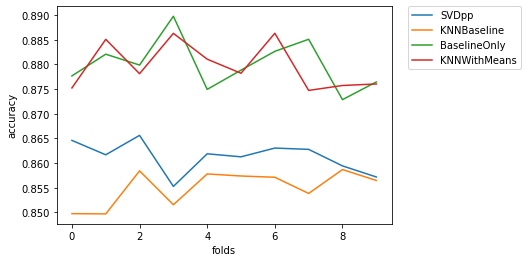

In [176]:
plt.plot(rmseSVDpp,label='SVDpp')
plt.plot(rmseKNNBaseline,label='KNNBaseline')
plt.plot(rmseBaselineOnly,label='BaselineOnly')
plt.plot(rmseKNNWithMeans,label='KNNWithMeans')

plt.xlabel('folds')
plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Use optimized model to recommend books

In [189]:
## Simple Popularity Based RS
ratings = pd.read_csv('Data/ratings10k.csv')
ratings_count = pd.DataFrame(ratings.groupby(['book_id'])['rating'].sum())
top10 = ratings_count.sort_values('rating', ascending = False).head(10)
print("The following books are recommended:")
top10.merge(books, how = 'left', on = 'book_id')

The following books are recommended:


,book_id,rating,goodreads_book_id,authors,original_publication_year,original_title,title,average_rating
0,4,5600.0,2657,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,4.25
1,25,5179.0,136251,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows (Harry Po...,4.61
2,2,5103.0,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
3,18,5068.0,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban (Harr...,4.53
4,24,4937.0,6,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire (Harry Pot...,4.53
5,27,4898.0,1,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,4.54
6,21,4804.0,2,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix (Har...,4.46
7,26,4658.0,968,Dan Brown,2003.0,The Da Vinci Code,"The Da Vinci Code (Robert Langdon, #2)",3.79
8,23,4608.0,15881,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,Harry Potter and the Chamber of Secrets (Harry...,4.37
9,8,4529.0,5107,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,3.79


In [143]:
# https://github.com/NicolasHug/Surprise/blob/master/examples/top_n_recommendations.py
"""
This module illustrates how to retrieve the top-10 items with highest rating
prediction. We first train an SVD algorithm on the MovieLens dataset, and then
predict all the ratings for the pairs (user, item) that are not in the training
set. We then retrieve the top-10 prediction for each user.
"""

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from collections import defaultdict

from surprise import SVDpp
from surprise import Dataset


def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [178]:
# Train the optimized algorithm on the dataset
data = surprise.Dataset.load_from_df(raw,reader)
trainset = data.build_full_trainset()
algo_KNNBaseline.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [179]:
# predict ratings for all user/item pairs that are NOT in the training set
testset = trainset.build_anti_testset()
predictions = algo_KNNBaseline.test(testset)

In [180]:
top_n = get_top_n(predictions, n = 10)

In [181]:
# print recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1 [2686, 8390, 4315, 8083, 1778, 6089, 8323, 8903, 4811, 753]
2 [103, 65, 113, 3020, 9114, 2584, 778, 1967, 5425, 102]
4 [1778, 5438, 7839, 4328, 6943, 7473, 8559, 9727, 8675, 6508]
6 [8946, 3628, 6772, 757, 1338, 4868, 6590, 6920, 4483, 1010]
8 [8946, 8038, 4258, 3366, 5192, 6505, 8055, 6487, 6898, 6411]
9 [8332, 5491, 8880, 4894, 8714, 7264, 8423, 5972, 9243, 4296]
11 [4054, 5830, 8946, 7806, 1705, 8585, 8035, 3055, 601, 1370]
15 [70, 102, 2586, 85, 5101, 8946, 8585, 661, 6018, 4315]
18 [4291, 3719, 9819, 2291, 2980, 6425, 7909, 5214, 7734, 6617]
22 [2686, 3753, 9934, 7006, 1705, 5805, 6368, 976, 4597, 1441]
24 [9268, 889, 1291, 841, 1336, 6988, 2432, 4850, 8558, 2189]
25 [5101, 1010, 8585, 5207, 4483, 6018, 8538, 7143, 4441, 8854]
28 [5044, 9587, 8848, 8503, 4978, 6019, 3158, 8879, 9347, 6725]
32 [8946, 8585, 6590, 5055, 4228, 9452, 9214, 3111, 6498, 6547]
29 [8286, 7428, 8163, 2696, 2078, 1013, 6617, 2191, 6702, 8922]
34 [6457, 1618, 2940, 8821, 541, 7974, 9887, 3418, 2526, 6856]
4

1362 [8946, 4287, 9397, 2898, 3275, 5254, 3664, 980, 2495, 2268]
1366 [8585, 8680, 7143, 2507, 8423, 5995, 9243, 5483, 7011, 5596]
1365 [413, 4087, 6201, 6772, 4868, 4154, 8946, 734, 2374, 1597]
1367 [3638, 3417, 1055, 436, 598, 1018, 1246, 180, 2959, 4972]
1368 [1778, 6802, 2078, 7514, 5610, 8524, 3661, 2744, 3669, 6697]
1260 [3752, 8946, 1160, 7081, 5580, 6995, 5968, 8186, 4982, 8324]
1315 [8585, 7143, 9291, 2078, 4411, 9372, 7750, 6131, 6425, 6736]
1374 [8585, 9268, 9197, 4411, 8259, 7710, 7060, 6559, 8946, 9727]
1131 [7357, 9156, 4680, 6252, 8433, 7543, 2078, 9004, 7349, 8259]
335 [9590, 1603, 7297, 8115, 9291, 565, 7264, 4860, 6613, 8390]
1281 [8946, 5312, 9590, 753, 9848, 3954, 2110, 6089, 1950, 6846]
1041 [8570, 8703, 9990, 7117, 1635, 2436, 3692, 7401, 3886, 9625]
1378 [5425, 47, 219, 1380, 1142, 740, 9308, 189, 109, 6604]
1377 [8946, 8818, 8332, 8714, 5044, 4902, 8423, 8589, 9243, 6055]
1087 [47, 7316, 7639, 8946, 8882, 3009, 6160, 6354, 6772, 1458]
383 [2686, 3753, 47, 81, 96

2439 [103, 5425, 516, 4054, 7409, 2299, 8882, 2698, 6772, 8818]
2438 [8946, 524, 6166, 4296, 8161, 3712, 3179, 2526, 585, 6444]
2282 [2078, 1823, 8397, 9848, 4832, 8880, 2572, 9323, 8850, 4302]
2440 [2686, 3753, 964, 2732, 3020, 6195, 3469, 7538, 3314, 2320]
2388 [3753, 24, 964, 337, 297, 9114, 102, 50, 87, 184]
2446 [7039, 1422, 6856, 5841, 6061, 9534, 6189, 6775, 174, 9688]
2452 [2686, 3753, 222, 200, 9606, 550, 168, 391, 958, 743]
2456 [3753, 21, 24, 964, 103, 255, 325, 3020, 614, 1237]
2454 [8332, 8585, 4894, 2507, 8423, 5972, 9243, 1479, 9452, 7832]
2449 [47, 9606, 4054, 8946, 8704, 8882, 6160, 6772, 9460, 8578]
2457 [258, 2318, 2686, 3753, 70, 964, 103, 255, 65, 113]
2459 [3753, 964, 297, 9114, 36, 102, 47, 219, 1055, 4054]
2464 [258, 260, 2318, 2686, 3753, 70, 388, 18, 27, 21]
1764 [2584, 222, 795, 3314, 4810, 4640, 2798, 109, 1210, 485]
2466 [3719, 2765, 8879, 2946, 7734, 2189, 8721, 4478, 6617, 3232]
1429 [8578, 3488, 9482, 6681, 8617, 2946, 4868, 4847, 6446, 9124]
1060 [5802,

3532 [85, 1010, 8946, 8585, 6590, 3628, 8714, 3650, 6648, 757]
3535 [5425, 102, 47, 50, 9606, 550, 85, 391, 958, 740]
3536 [8946, 8585, 4894, 7143, 1778, 3151, 9988, 7236, 2158, 1338]
3539 [8946, 8286, 4868, 9848, 6650, 6133, 3520, 8201, 7589, 2753]
3542 [8290, 2887, 1778, 8203, 151, 6825, 2202, 9793, 5483, 3695]
3543 [2266, 4894, 6189, 844, 1833, 2892, 2968, 4886, 4320, 1330]
3545 [70, 103, 102, 50, 1055, 4054, 1380, 1010, 39, 80]
3546 [1010, 8946, 9773, 7606, 2174, 8233, 532, 3520, 8864, 2865]
3145 [70, 219, 245, 344, 177, 4, 230, 66, 85, 3428]
3544 [4535, 3719, 9819, 2980, 8161, 6425, 3840, 8558, 1792, 9472]
3554 [260, 2318, 2686, 3753, 8519, 70, 18, 27, 21, 24]
3555 [8332, 8714, 7054, 5681, 8423, 5995, 9214, 8033, 4069, 9272]
3398 [3753, 102, 87, 550, 1380, 85, 391, 958, 5101, 296]
3557 [47, 7254, 2586, 391, 1010, 4483, 6590, 6920, 6361, 998]
3558 [3753, 4054, 958, 740, 1010, 1018, 2299, 110, 2716, 7639]
3446 [103, 102, 47, 50, 184, 1055, 181, 115, 2339, 709]
3563 [3753, 964, 2172,

4637 [2318, 3753, 70, 27, 24, 964, 103, 65, 297, 113]
4643 [5961, 4222, 8738, 2191, 9350, 4242, 9268, 9773, 9281, 6055]
4638 [1601, 9254, 9590, 7401, 8838, 8832, 4154, 8856, 8035, 1833]
4560 [47, 4054, 391, 296, 8946, 599, 6772, 661, 3519, 524]
4614 [8946, 7401, 6902, 93, 1265, 2879, 1833, 422, 3628, 6772]
4647 [7254, 39, 110, 8946, 189, 137, 5207, 1788, 4483, 6590]
4650 [1967, 1380, 7409, 9308, 1010, 8946, 5754, 2698, 6772, 2729]
4529 [5563, 8608, 8431, 3482, 4514, 9575, 6775, 2619, 8854, 8161]
4653 [488, 1322, 740, 5115, 6211, 8946, 6772, 4483, 3521, 8763]
4561 [9746, 7878, 4886, 4709, 8946, 1603, 5683, 4501, 8423, 8000]
4635 [3753, 70, 964, 103, 337, 297, 3020, 9114, 2584, 5425]
3902 [9963, 9298, 3175, 5483, 8946, 5413, 6987, 4638, 8294, 9457]
4594 [2686, 3753, 70, 18, 27, 103, 337, 297, 476, 102]
4656 [4726, 6411, 8165, 7325, 6189, 5798, 8320, 7942, 6591, 2078]
4660 [1335, 3225, 7516, 2758, 85, 2716, 2879, 6457, 513, 3695]
4661 [8946, 6772, 6648, 3143, 7910, 4982, 6617, 2191, 3669,

5663 [2339, 6211, 5207, 2937, 3613, 8906, 8951, 788, 5707, 6752]
4743 [4054, 8946, 8084, 1480, 7981, 4981, 5495, 3331, 5945, 2266]
2806 [70, 27, 21, 24, 964, 103, 337, 325, 5425, 1237]
854 [258, 2318, 3753, 18, 27, 21, 964, 297, 113, 325]
5647 [258, 3753, 70, 18, 21, 2, 23, 24, 103, 58]
5669 [219, 1142, 80, 8946, 2869, 8585, 6018, 5378, 8233, 490]
5670 [70, 103, 7254, 2586, 1970, 5101, 1010, 520, 5115, 4640]
5672 [3753, 6089, 6678, 1049, 389, 565, 422, 9472, 2894, 3348]
4107 [4868, 6920, 4483, 4154, 7254, 2374, 1597, 422, 6902, 85]
877 [490, 793, 189, 5508, 6590, 4, 463, 102, 7907, 1402]
5258 [103, 337, 297, 50, 7409, 296, 5508, 6772, 661, 7227]
1154 [102, 191, 25, 1199, 8946, 337, 161, 561, 89, 67]
5678 [2975, 8946, 4672, 3916, 6064, 6575, 6590, 6920, 2266, 7231]
5679 [102, 47, 7254, 2586, 391, 1010, 5207, 4483, 6590, 6920]
5082 [1603, 5493, 8976, 6697, 4302, 3174, 2825, 524, 4894, 1823]
5681 [1010, 8946, 8423, 3721, 9956, 3052, 4731, 6920, 7907, 4874]
4751 [8946, 3628, 6772, 757, 133

In [182]:
type(top_n)

collections.defaultdict

In [183]:
books.columns

Index(['book_id', 'goodreads_book_id', 'authors', 'original_publication_year',
       'original_title', 'title', 'average_rating'],
      dtype='object')

In [184]:
books = books[['book_id', 'goodreads_book_id', 
               'authors', 'original_publication_year', 'original_title',
              'title', 'average_rating']]
books.head()

,book_id,goodreads_book_id,authors,original_publication_year,original_title,title,average_rating
0,1,2767052,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34
1,2,3,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,3,41865,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",3.57
3,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,4.25
4,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,3.89


In [185]:
ratings2 = pd.DataFrame(ratings[ratings['user_id'] == 2])
print(ratings2)

    user_id  book_id  rating
1         2     4081     4.0
2         2      260     5.0
3         2     9296     5.0
4         2     2318     3.0
5         2       26     4.0
6         2      315     3.0
7         2       33     4.0
8         2      301     5.0
9         2     2686     5.0
10        2     3753     5.0
11        2     8519     5.0


In [186]:
ratings2 = pd.merge(ratings2, books, how = 'left', on = 'book_id')
ratings2

,user_id,book_id,rating,goodreads_book_id,authors,original_publication_year,original_title,title,average_rating
0,2,4081,4.0,231,Tom Wolfe,2004.0,NaN,I am Charlotte Simmons,3.40
1,2,260,5.0,4865,Dale Carnegie,1936.0,How to Win Friends and Influence People,How to Win Friends and Influence People,4.13
2,2,9296,5.0,4887,"Alice Miller, Ruth Ward",1979.0,Das Drama des begabten Kindes und die Suche na...,The Drama of the Gifted Child: The Search for ...,4.09
3,2,2318,3.0,998,"Thomas J. Stanley, William D. Danko",1995.0,The Millionaire Next Door: The Surprising Secr...,The Millionaire Next Door: The Surprising Secr...,4.00
4,2,26,4.0,968,Dan Brown,2003.0,The Da Vinci Code,"The Da Vinci Code (Robert Langdon, #2)",3.79
5,2,315,3.0,4894,"Spencer Johnson, Kenneth H. Blanchard",1998.0,Who Moved My Cheese?,Who Moved My Cheese?,3.74
6,2,33,4.0,930,Arthur Golden,1997.0,Memoirs of a Geisha,Memoirs of a Geisha,4.08
7,2,301,5.0,4900,Joseph Conrad,1899.0,Heart of Darkness,Heart of Darkness,3.42
8,2,2686,5.0,4898,"W. Chan Kim, Renée Mauborgne",2004.0,Blue Ocean Strategy: How to Create Uncontested...,Blue Ocean Strategy: How To Create Uncontested...,3.86
9,2,3753,5.0,10,J.K. Rowling,2005.0,"Harry Potter Collection (Harry Potter, #1-6)","Harry Potter Collection (Harry Potter, #1-6)",4.73


In [187]:
user2 = pd.DataFrame(top_n[2])
user2.columns = ['book_id', 'pred_rating']
user2.head()

,book_id,pred_rating
0,103,5
1,65,5
2,113,5
3,3020,5
4,9114,5


In [188]:
user2 = pd.merge(user2, books, how = 'left', on = 'book_id')
user2

,book_id,pred_rating,goodreads_book_id,authors,original_publication_year,original_title,title,average_rating
0,103,5,7126,"Alexandre Dumas, Robin Buss",1844.0,Le Comte de Monte-Cristo,The Count of Monte Cristo,4.21
1,65,5,4981,Kurt Vonnegut Jr.,1969.0,"Slaughterhouse-Five, or The Children's Crusade...",Slaughterhouse-Five,4.06
2,113,5,168668,Joseph Heller,1961.0,Catch-22,Catch-22,3.98
3,3020,5,7723,"Franz Kafka, Jason Baker, Donna Freed",1915.0,Die Verwandlung und andere Erzählungen,The Metamorphosis and Other Stories,4.01
4,9114,5,132314,Edgar Allan Poe,1849.0,The Complete Tales and Poems of Edgar Allan Poe,The Complete Tales and Poems,4.48
5,2584,5,393199,George Orwell,1933.0,Down and Out in Paris and London,Down and Out in Paris and London,4.10
6,778,5,30597,"Victor Hugo, Walter J. Cobb",1831.0,Notre-Dame de Paris,The Hunchback of Notre-Dame,3.97
7,1967,5,30659,"Marcus Aurelius, Martin Hammond, Diskin Clay",180.0,Τὰ εἰς ἑαυτόν,Meditations,4.20
8,5425,5,30672,"Arthur Koestler, Daphne Hardy",1940.0,Sonnenfinsternis,Darkness at Noon,4.06
9,102,5,19543,Maurice Sendak,1963.0,Where the Wild Things Are,Where the Wild Things Are,4.22
